In questo Notebook andremo a fare un'analisi di un dataset dato da un'App di Yoga.
Gli obbiettivi sono :
- Analizzare l'anno 2021 in generale

-  Nello specifico,Trovare tendenze come:
   - Categorie più apprezzate
   - Andamento degli iscritti
   - Mesi più attivi
   - Classi più popolari 
   - Apprezzamento delle categorie 


In [48]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


%matplotlib inline 

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",message="The figure layout has changed to tight")


In [49]:
df = pd.read_csv('Lifestyle_data Final Project.csv')

In [50]:
df.head()

,class_date,user_uuid,category,coach_id,language,level,challenge_id,country,subscription_date,platform,class_id,stars
0,1-2-2023,2,meditation,102,it,basic,3,it,6-1-2022,tv,2157,1
1,22-5-2023,241,power yoga,111,it,basic,1,it,11-5-2022,pc,6172,3
2,6-8-2022,173,power yoga,117,it,advanced,3,it,12-12-2021,pc,6255,2
3,8-8-2023,217,hatha,100,en,intermediate,3,uk,7-2-2022,tv,3317,4
4,11-3-2022,230,power yoga,113,fr,basic,2,fr,9-1-2020,pc,6159,1


In [51]:
df.shape

(999, 12)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   class_date         999 non-null    object
 1   user_uuid          999 non-null    int64 
 2   category           999 non-null    object
 3   coach_id           999 non-null    int64 
 4   language           999 non-null    object
 5   level              999 non-null    object
 6   challenge_id       999 non-null    int64 
 7   country            999 non-null    object
 8   subscription_date  999 non-null    object
 9   platform           999 non-null    object
 10  class_id           999 non-null    int64 
 11  stars              999 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 93.8+ KB


In [53]:
df.describe().round(2)

,user_uuid,coach_id,challenge_id,class_id,stars
count,999.00,999.00,999.00,999.00,999.00
mean,120.66,111.20,1.50,4171.79,3.02
std,71.17,6.55,1.12,1878.22,1.42
min,1.00,100.00,0.00,211.00,1.00
25%,58.50,106.00,1.00,3149.00,2.00
50%,118.00,111.00,1.00,4220.00,3.00
75%,182.00,117.00,3.00,6215.00,4.00
max,245.00,122.00,3.00,6399.00,5.00


In [54]:
df.nunique()

class_date           554
user_uuid            240
category               4
coach_id              23
language               3
level                  3
challenge_id           4
country                3
subscription_date    219
platform               3
class_id             636
stars                  5
dtype: int64

- La colonna 'class_date'  mostra una significativa varietà di date, indicando che il dataset copre un ampio arco temporale e che gli utenti sono attivi per quanto riguarda il periodo analizzato.
- Ci sono 240 utenti unici, ma considerando che ci sono 999 record, molti utenti hanno partecipato a più di una classe.
- Con 4 categorie di classi, 23 coach diversi e 636 ID di classe unici, il dataset riflette una vasta gamma di offerte di classi.
- La presenza di 3 lingue e 3 livelli di difficoltà suggerisce una certa varietà nell'offerta delle classi per coprire diverse esigenze.
- La presenza di utenti da 3 paesi diversi indica un pubblico internazionale.
- L'esistenza di 3 diverse piattaforme mostra i modi in cui gli utenti partecipano alle classi.
- La varietà nelle valutazioni (5 valori unici) offre la possibilità di capire come vengono percepite le classi dagli utenti.



prepariamo la time series ed andiamo ad analizzare nello specifico l'anno 2021

In [55]:
df['class_date'] = pd.to_datetime(df['class_date'], format= '%d-%m-%Y')

df_2021 = df[df['class_date'].dt.year == 2021].copy()

In [56]:


#df_2021['month'] = df_2021['class_date'].dt.month_name()



In [57]:
timeser_2021 =(df_2021).copy()

timeser_2021.set_index('class_date',inplace=True)

,user_uuid,category,coach_id,language,level,challenge_id,country,subscription_date,platform,class_id,stars
class_date,,,,,,,,,,,
2021-05-23,103,meditation,111,fr,basic,1,fr,25-3-2020,tv,2194,3
2021-10-24,103,power yoga,110,fr,basic,0,fr,25-3-2020,pc,6139,1
2021-06-17,225,vinyasa,104,it,intermediate,1,it,25-12-2020,mobile,4324,5
2021-07-07,157,hatha,105,it,advanced,2,it,12-2-2020,tv,3283,2
2021-07-16,3,power yoga,115,it,basic,2,it,22-7-2020,mobile,6173,4
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-14,65,hatha,109,en,intermediate,3,uk,4-5-2020,tv,3344,4
2021-06-02,139,vinyasa,115,fr,basic,3,fr,28-3-2020,tv,4199,5
2021-11-04,145,vinyasa,100,it,basic,0,it,13-1-2020,tv,4190,4


In [58]:
mediaDfQuart_2021 = timeser_2021.resample('M').count()
mediaDfQuart_2021.index = mediaDfQuart_2021.index.month_name()

,user_uuid,category,coach_id,language,level,challenge_id,country,subscription_date,platform,class_id,stars
class_date,,,,,,,,,,,
January,2,2,2,2,2,2,2,2,2,2,2
February,5,5,5,5,5,5,5,5,5,5,5
March,6,6,6,6,6,6,6,6,6,6,6
April,4,4,4,4,4,4,4,4,4,4,4
May,7,7,7,7,7,7,7,7,7,7,7
June,10,10,10,10,10,10,10,10,10,10,10
July,14,14,14,14,14,14,14,14,14,14,14
August,9,9,9,9,9,9,9,9,9,9,9
September,14,14,14,14,14,14,14,14,14,14,14


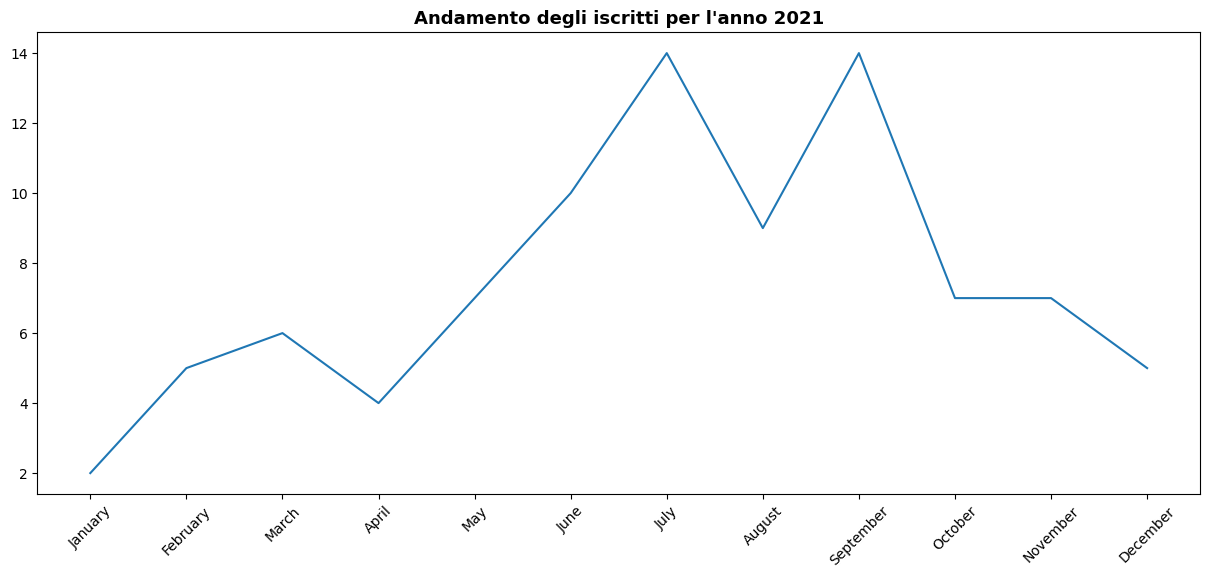

In [84]:
#Serie Temporale sugli abbonati
plt.figure(figsize=(15,6))
plt.plot(mediaDfQuart_2021.index,mediaDfQuart_2021['subscription_date'])
plt.title("Andamento degli iscritti per l'anno 2021", fontsize = 13,fontweight = '900', color = 'black')
plt.xticks(mediaDfQuart_2021.index,rotation = 45)
plt.show()

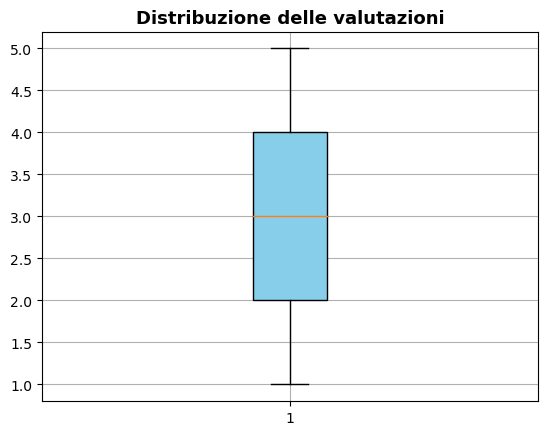

In [83]:

plt.boxplot(data=df_2021, x= 'stars', patch_artist= True,boxprops= {'facecolor' : 'skyblue'})
plt.title('Distribuzione delle valutazioni',fontsize = 13, fontweight = '900', color = 'black')
plt.grid()
plt.show()

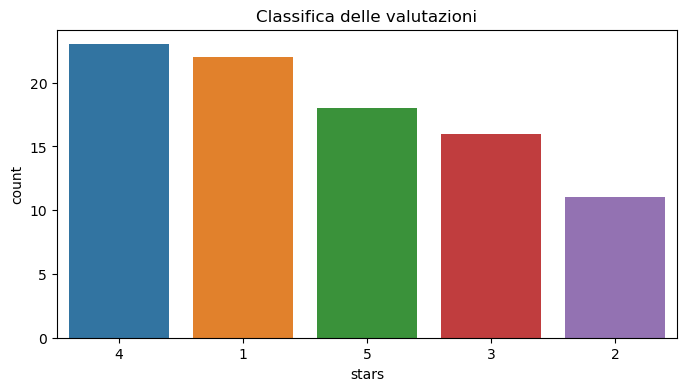

In [61]:
stars_order = df_2021['stars'].value_counts().index

plt.figure(figsize=(8,4))
sns.countplot(data=df_2021, x= 'stars',order= stars_order)
plt.title('Classifica delle valutazioni', fontsize = 13, fontweight = '900', color = 'black')
plt.show()

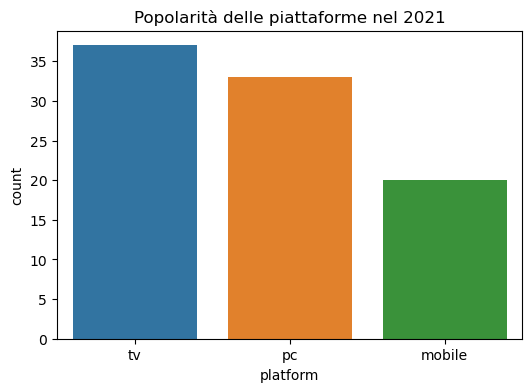

In [62]:
order_plat = df_2021['platform'].value_counts().index
#Classifica sull'uso delle piattaforme
plt.figure(figsize=(6,4))
sns.countplot(data=df_2021, x='platform', order= order_plat)
plt.title('Popolarità delle piattaforme nel 2021',fontsize = 13, fontweight = '900', color = 'black')
plt.show()

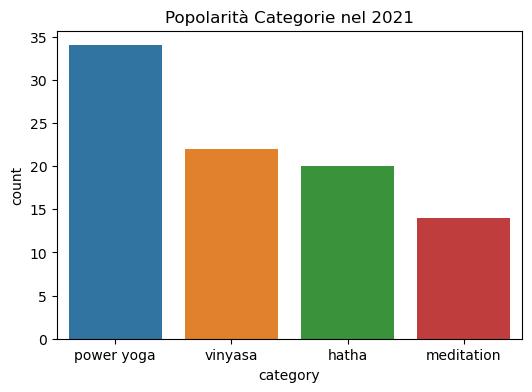

In [63]:
order_cat = df_2021['category'].value_counts().index
#Classifca categorie 

plt.figure(figsize=(6,4))
sns.countplot(data=df_2021, x='category', order= order_cat)
plt.title('Popolarità Categorie nel 2021',fontsize = 13, fontweight = '900', color = 'black')
plt.show()

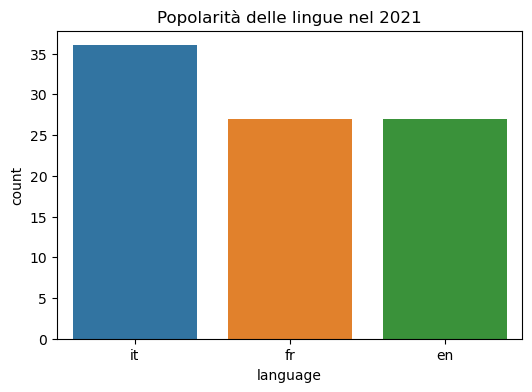

In [64]:
lang_order = df_2021['language'].value_counts().index

plt.figure(figsize=(6,4))
sns.countplot(data=df_2021, x = 'language',order = lang_order)
plt.title('Popolarità delle lingue nel 2021',fontsize = 13, fontweight = '900', color = 'black')
plt.show()

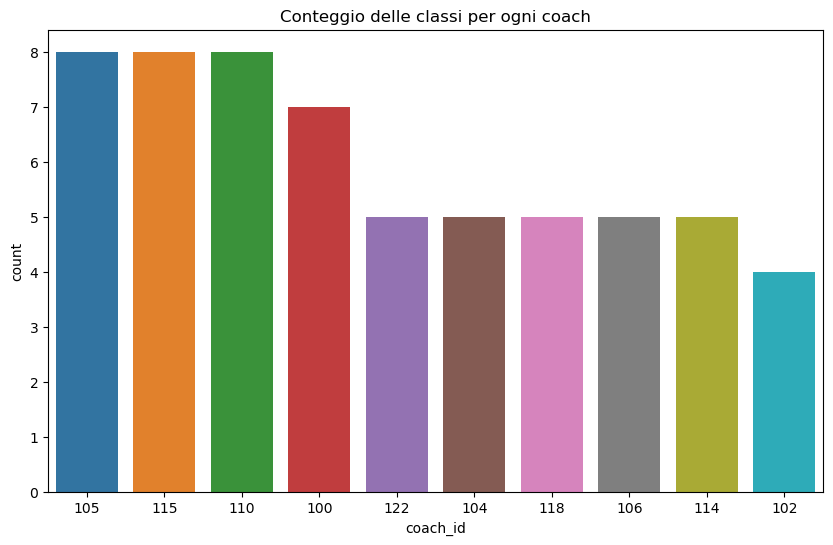

In [65]:
order_coach = df_2021['coach_id'].value_counts()

top_10_coach = order_coach.head(10).index

plt.figure(figsize=(10,6))
sns.countplot(data=df_2021,x='coach_id',order=top_10_coach)
plt.title('Conteggio delle classi per ogni coach',fontsize = 13, fontweight = '900', color = 'black')
plt.show()

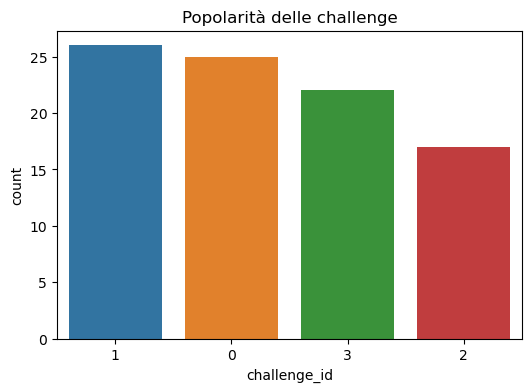

In [66]:
order_chall = df_2021['challenge_id'].value_counts().index

plt.figure(figsize=(6,4))
sns.countplot(data=df_2021,x='challenge_id', order = order_chall)
plt.title('Popolarità delle challenge',fontsize = 13, fontweight = '900', color = 'black')
plt.show()

In [67]:
usr_count = df_2021['user_uuid'].nunique()
coac_count= df_2021['coach_id'].nunique()
clas_count= df_2021['class_id'].nunique()
Class_date_uniq = df_2021['class_date'].nunique()
class_date_count = df_2021['class_date'].count()
avg_stars_score = df_2021['stars'].mean().__round__(2)

stats = {
    "N. Utenti nel 2021": usr_count,
    "N. Coach nel 2021": coac_count,
    'N. di classi nel 2021': clas_count,
    "N. giorni con accessi all'app": Class_date_uniq,
    "N. di classi fatte nel 2021": class_date_count,
    "Punteggio medio 'Stars' " : avg_stars_score
}

# Ciclo for per stampare le informazioni
for descrizione, valore in stats.items():
    print(f"{descrizione}: {valore}") 

N. Utenti nel 2021: 55
N. Coach nel 2021: 22
N. di classi nel 2021: 86
N. giorni con accessi all'app: 77
N. di classi fatte nel 2021: 90
Punteggio medio 'Stars' : 3.04


In [69]:
df_2021['month'] = df_2021['class_date'].dt.month_name()

top_3_month = df_2021['month'].value_counts().head(3)

result_t = top_3_month.reset_index()

result_t.columns = ['month','N. of class made']

print('ranking')
print(result_t.to_string(index=False))

ranking
    month  N. of class made
     July                14
September                14
     June                10


In [70]:
result_country = df_2021['country'].value_counts().reset_index()

result_country.columns = ['country','N. Utenti per country']

print('Country')
print(result_country.to_string(index=False))

Country
country  N. Utenti per country
     it                     36
     fr                     27
     uk                     27


In [71]:
top_class = df.groupby(['category','class_id'])['class_date'].count().reset_index()

top_class.columns = ['category', 'ID class', 'number of classes']

top_class = top_class.sort_values(by='number of classes',ascending=False).head(5)

print('ranking')
print(top_class.to_string(index=False))

ranking
  category  ID class  number of classes
power yoga      6215                  6
power yoga      6283                  6
power yoga      6263                  5
     hatha      3251                  5
power yoga      6237                  5


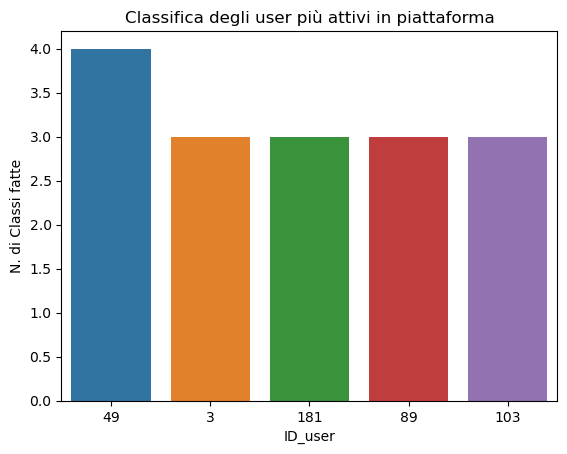

In [72]:
top_user = df_2021.groupby('user_uuid')['class_date'].count().reset_index()
top_user.columns = ['ID_user','N. di Classi fatte']

top_user = top_user.sort_values(by='N. di Classi fatte',ascending=False).head(5)

sns.barplot(data=top_user,x='ID_user',y='N. di Classi fatte', order=top_user['ID_user'])
plt.title('Classifica degli user più attivi in piattaforma',fontsize = 13, fontweight = '900', color = 'black')
plt.show()
#valutare se togliere

In [73]:
df_2021.groupby('category')['stars'].mean().__round__(2).sort_values(ascending=False)

category
meditation    3.57
power yoga    3.12
vinyasa       3.00
hatha         2.60
Name: stars, dtype: float64

In [74]:
df_2021.groupby('category')['class_id'].nunique().sort_values(ascending=False)

category
power yoga    31
vinyasa       21
hatha         20
meditation    14
Name: class_id, dtype: int64

In [75]:
df.groupby('category')['platform'].value_counts().sort_index(ascending=False)

category    platform
vinyasa     tv          135
            pc           86
            mobile       55
power yoga  tv          193
            pc          132
            mobile       71
meditation  tv           59
            pc           60
            mobile       29
hatha       tv           79
            pc           58
            mobile       42
Name: count, dtype: int64

In [77]:
df.head()

,class_date,user_uuid,category,coach_id,language,level,challenge_id,country,subscription_date,platform,class_id,stars
0,2023-02-01,2,meditation,102,it,basic,3,it,6-1-2022,tv,2157,1
1,2023-05-22,241,power yoga,111,it,basic,1,it,11-5-2022,pc,6172,3
2,2022-08-06,173,power yoga,117,it,advanced,3,it,12-12-2021,pc,6255,2
3,2023-08-08,217,hatha,100,en,intermediate,3,uk,7-2-2022,tv,3317,4
4,2022-03-11,230,power yoga,113,fr,basic,2,fr,9-1-2020,pc,6159,1


In [90]:
df_2021.groupby('category')['level'].value_counts().sort_index(ascending=True)

category    level       
hatha       advanced         8
            basic            9
            intermediate     3
meditation  advanced         4
            basic            6
            intermediate     4
power yoga  advanced        16
            basic           11
            intermediate     7
vinyasa     advanced         7
            basic            9
            intermediate     6
Name: count, dtype: int64

In [79]:
df_2021.groupby('category')['user_uuid'].nunique()

category
hatha         20
meditation    13
power yoga    29
vinyasa       20
Name: user_uuid, dtype: int64

In [80]:
df_2021.to_excel('dataset2021.xlsx',index=False)
df.to_excel('dataset.xlsx',index=False)